In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import glob
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
matplotlib.rcParams["backend"] = "Agg"

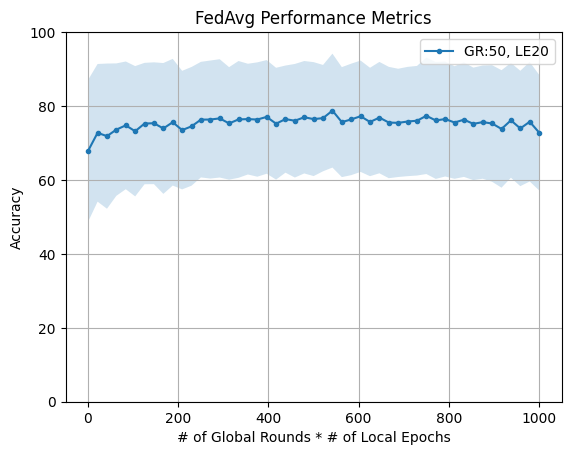

In [15]:
files = glob.glob("./out/FedAvg/*_client_acc_metrics.csv")

for idx, file in enumerate(files):
    gr = file.split("_")[2].split("gr")[1]
    le = file.split("_")[3].split("le")[1]
    file_data = pd.read_csv(file)
    rng = int(gr) * int(le)
    file_data.replace(0, np.nan, inplace=True)
    x = file_data.T.agg(['mean', 'std'])
    plt.plot(np.linspace(1, rng, num=int(gr)-1), x.iloc[0], label=f"GR:{gr}, LE{le}", marker='.',)
    plt.fill_between(np.linspace(1, rng, num=int(gr)-1), x.iloc[0] - x.iloc[1] ,  x.iloc[0] + x.iloc[1], alpha=0.2)

plt.title('FedAvg Performance Metrics')
plt.ylim(0, 100)
plt.xlabel("# of Global Rounds * # of Local Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
# plt.show()
plt.savefig('test_avg.jpeg', bbox_inches="tight")


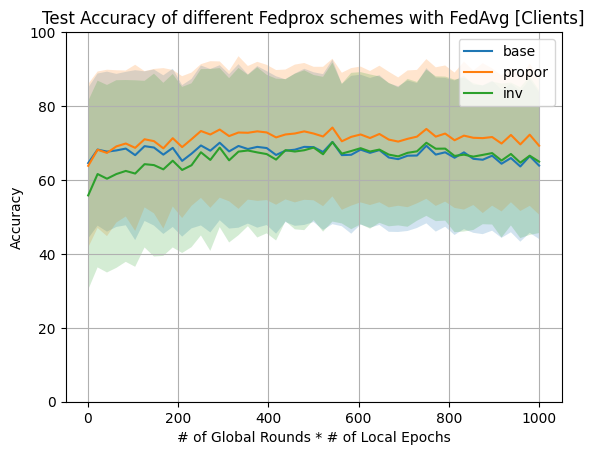

In [16]:
# sourcery skip: remove-redundant-fstring
import matplotlib
matplotlib.use("Agg")


files = glob.glob("./out/Fedprox/*_client_acc_metrics.csv")
naming = {0:'base', 1:'propor', 2:'inv'} 

for idx, file in enumerate(files):
    gr = file.split("_")[2].split("gr")[1]
    le = file.split("_")[3].split("le")[1]
    prox_lambda = int(file.split("_")[5])
    
    file_data = pd.read_csv(file)
    rng = int(gr) * int(le)
    file_data.replace(0, np.nan, inplace=True)
    x = file_data.T.agg(['mean', 'std'])
    
    plt.plot(np.linspace(1, rng, num=int(gr)-1), x.iloc[0], label=f"{naming[idx]}",)
    plt.fill_between(np.linspace(1, rng, num=int(gr)-1), x.iloc[0] - x.iloc[1] ,  x.iloc[0] + x.iloc[1], alpha=0.2)


files = glob.glob("./out/Fedprox/*_client_acc_metrics_avg.csv")

linestyle = {
    "after": "dashed",
}
for file in files:
    gr = file.split("_")[2].split("gr")[1]
    le = file.split("_")[3].split("le")[1]

    file_data = pd.read_csv(file)
    rng = int(gr) * int(le)
    x = file_data.T.agg(['mean', 'std'])

    plt.plot(
        np.linspace(1, rng, num=int(gr)-1),
        x.iloc[0],
        label= f'Avg ', #f'GR{gr}, LE{le}',
        ls='-.',
    )
        
plt.title('Test Accuracy of different Fedprox schemes with FedAvg [Clients]')
plt.ylim(0, 100)
plt.xlabel("# of Global Rounds * # of Local Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
# plt.show()
plt.savefig('test_prox.jpeg', bbox_inches="tight")

